<a href="https://colab.research.google.com/github/Plluxury/XXX/blob/main/DZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Импортируем библиотеки
import numpy as np
import pandas as pd


In [ ]:
#считываем данные из нашей таблицы
df = pd.read_table('SMSSpamCollection',
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])
df.shape

(5572, 2)

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


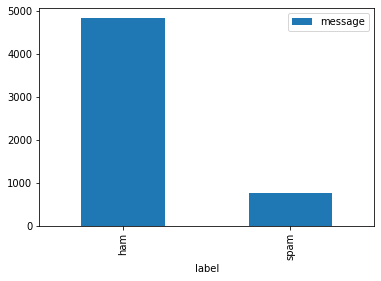

In [ ]:
#посмотрим распределение классов
df.groupby('label').count().plot(kind='bar')

In [ ]:
df['label'] = df.label.map({'ham': 0, 'spam': 1})

In [ ]:
#переведем текст сообщений в нижний регистр
df['message'] = df.message.map(lambda x: x.lower())

In [ ]:
#удалим знаки препинания
df['message'] = df.message.str.replace('[^\w\s]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
#токенизируем текст
import nltk
nltk.download('punkt')
df['message'] = df['message'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#используем стемминг
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['message'] = df['message'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
#посмотрим, как изменился набор данных
df.head()

,label,message
0,0,"[go, until, jurong, point, crazi, avail, onli,..."
1,0,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,0,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,0,"[nah, i, dont, think, he, goe, to, usf, he, li..."


In [ ]:
#закодируем текст методом "мешок слов"
from sklearn.feature_extraction.text import CountVectorizer
# преобразуем список слов в строки, разделенные пробелами
df['message'] = df['message'].apply(lambda x: ' '.join(x))
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['message'])

In [ ]:
counts.shape

(5572, 8169)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.25)

In [ ]:
#Используем наивный байесовский классификатор:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)
model.score(X_test, y_test)

0.9784637473079684

In [ ]:
predictions = model.predict(X_test)

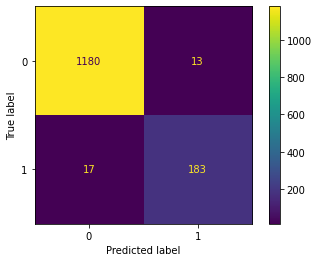

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot()